In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
file_path = '../../data/dataS.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

df.head()

,Date,Open,High,Low,Close,SP500_Adj_Close,move,Volume,volatility,volatility_forcast,returns,GARCH_VM
0,2003-01-03,0.0477,0.0030,0.0015,0.0005,0.0482,1,0.0698,0.0668,0.2115,0.5843,0.0472
1,2003-01-06,0.0476,0.0014,0.0027,0.0049,0.0525,0,0.0973,0.2115,0.0912,0.6219,0.0377
2,2003-01-07,0.0518,0.0030,0.0009,0.0006,0.0512,0,0.1071,0.0912,0.1286,0.5742,0.0319
3,2003-01-08,0.0505,0.0033,0.0002,0.0020,0.0485,1,0.1001,0.1286,0.1648,0.5617,0.0256
4,2003-01-09,0.0478,0.0005,0.0028,0.0044,0.0522,0,0.1085,0.1648,0.1331,0.6169,0.0212


In [4]:
df.describe()


,Date,Open,High,Low,Close,SP500_Adj_Close,move,Volume,volatility,volatility_forcast,returns,GARCH_VM
count,5369,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.00000,5369.000000
mean,2013-09-30 01:09:11.834606080,0.305690,0.002560,0.002656,0.003202,0.307003,0.544980,0.295592,0.095812,0.095807,0.58663,0.014663
min,2003-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2008-05-16 00:00:00,0.115200,0.001500,0.001400,0.001000,0.116000,0.000000,0.231000,0.043800,0.043800,0.57110,0.001500
50%,2013-09-30 00:00:00,0.211300,0.002500,0.002400,0.002100,0.212400,1.000000,0.294700,0.073100,0.073100,0.58730,0.003700
75%,2019-02-14 00:00:00,0.443300,0.003300,0.003100,0.004100,0.445200,1.000000,0.353400,0.117900,0.117900,0.60340,0.012400
max,2024-06-28 00:00:00,1.000000,0.029900,0.029100,0.032900,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
std,NaN,0.242488,0.001909,0.002399,0.003497,0.243057,0.498019,0.122345,0.086633,0.086636,0.04774,0.039962


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5369 non-null   datetime64[ns]
 1   Open                5369 non-null   float64       
 2   High                5369 non-null   float64       
 3   Low                 5369 non-null   float64       
 4   Close               5369 non-null   float64       
 5   SP500_Adj_Close     5369 non-null   float64       
 6   move                5369 non-null   int64         
 7   Volume              5369 non-null   float64       
 8   volatility          5369 non-null   float64       
 9   volatility_forcast  5369 non-null   float64       
 10  returns             5369 non-null   float64       
 11  GARCH_VM            5369 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 503.5 KB


                                Date   volatility
count                           5369  5369.000000
mean   2013-09-30 01:09:11.834606080     0.095812
min              2003-01-03 00:00:00     0.000000
25%              2008-05-16 00:00:00     0.043800
50%              2013-09-30 00:00:00     0.073100
75%              2019-02-14 00:00:00     0.117900
max              2024-06-28 00:00:00     1.000000
std                              NaN     0.086633


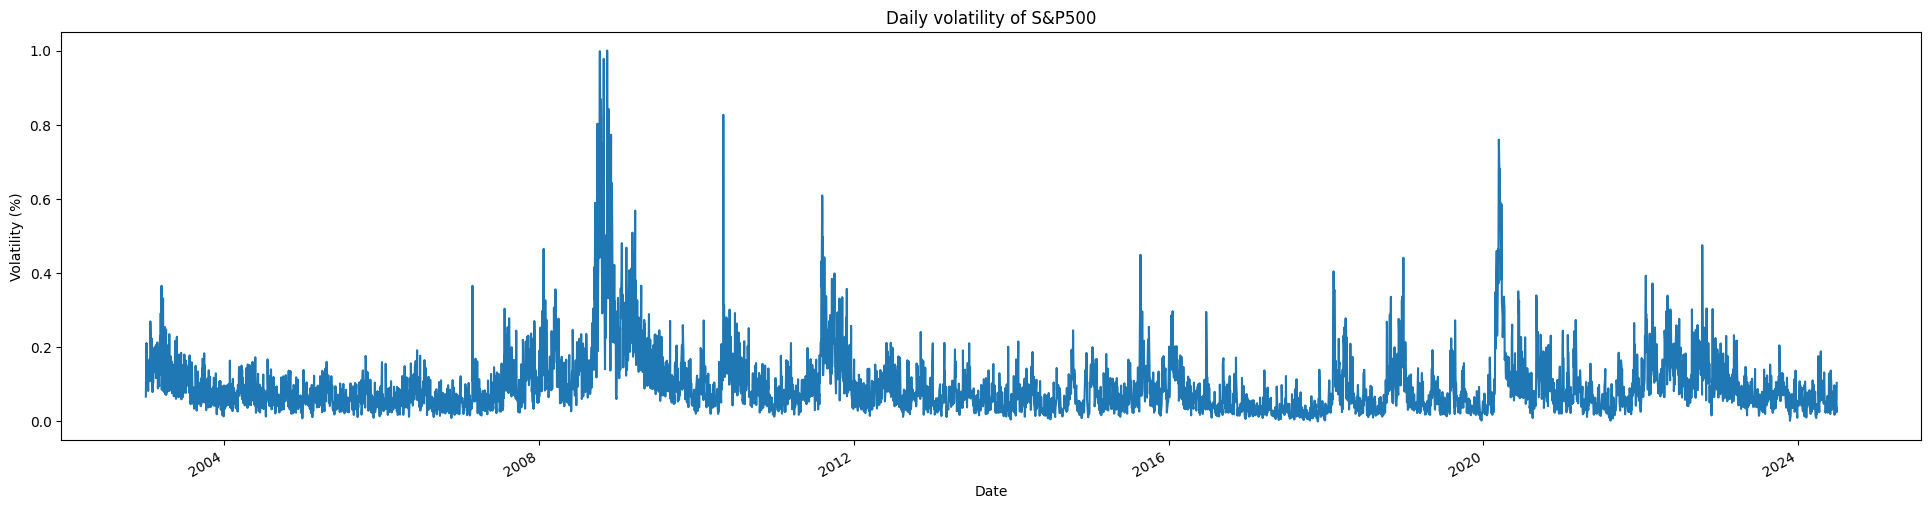

In [6]:
print(df[['Date', 'volatility']].describe())

df.set_index('Date')['volatility'].plot(figsize=(24, 6))
plt.title("Daily volatility of S&P500")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.show()

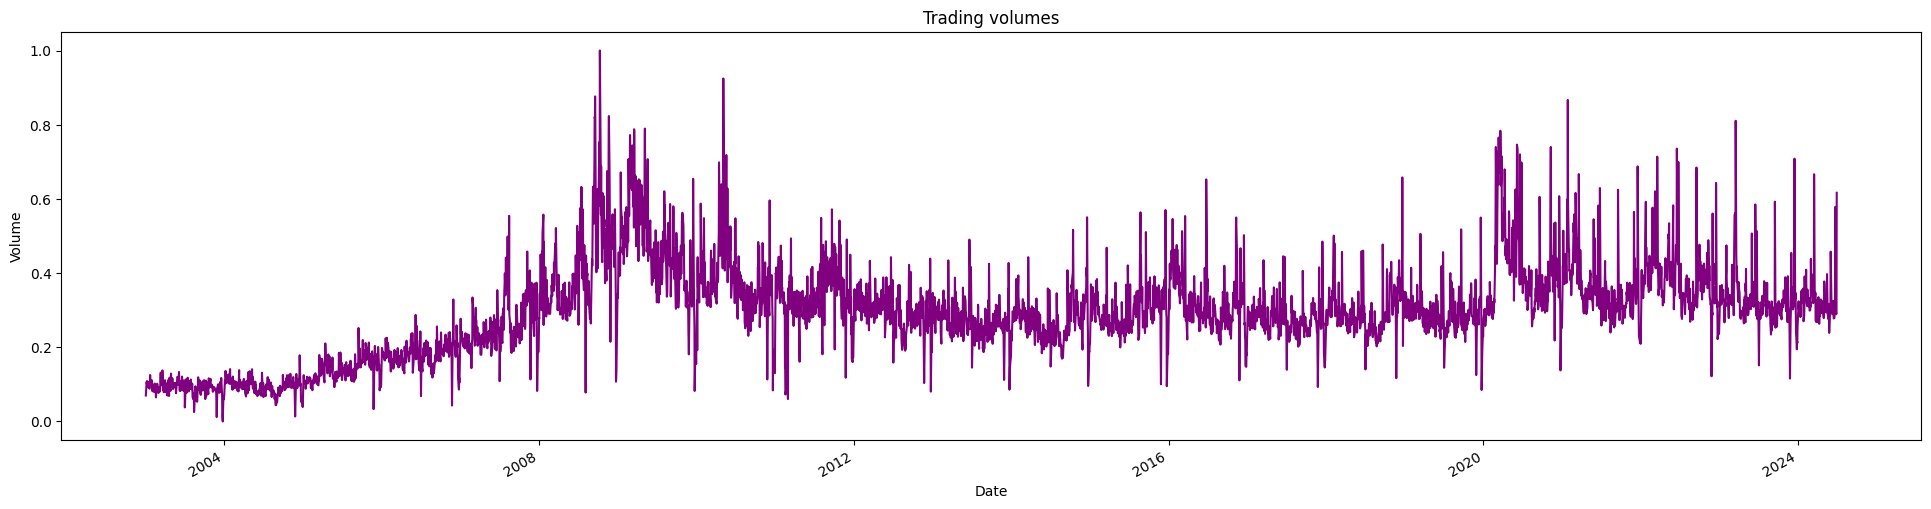

In [7]:
df.set_index('Date')['Volume'].plot(figsize=(24, 6), color='purple')
plt.title("Trading volumes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


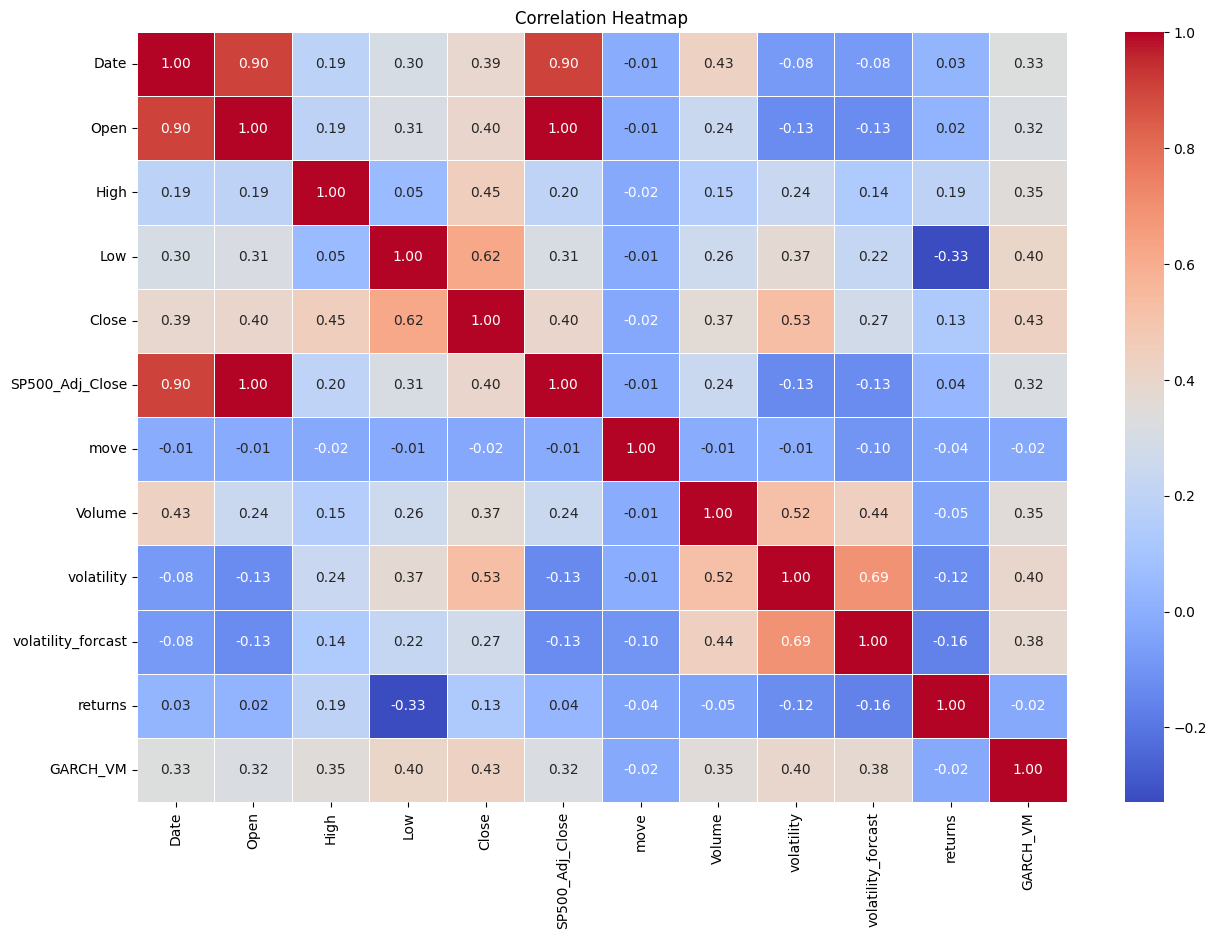

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_6712\2922925087.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['volatility_forcast'], shade=True)


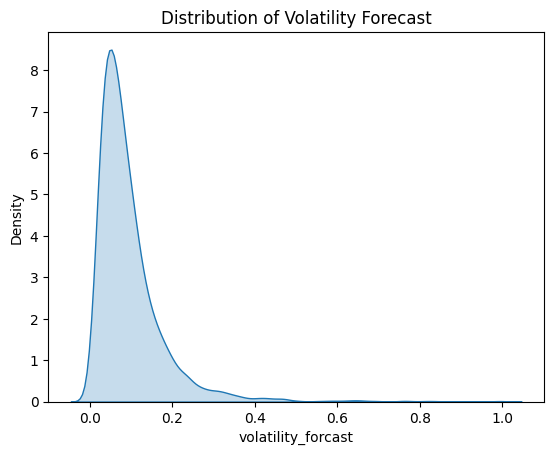

In [9]:
sns.kdeplot(df['volatility_forcast'], shade=True)
plt.title('Distribution of Volatility Forecast')
plt.show()


In [10]:
sns.pairplot(df[['returns', 'volatility_forcast', 'GARCH_VM', 'EWMA_VM']])
plt.show()


KeyError: "['EWMA_VM'] not in index"

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = df.drop(['Date', 'volatility_forcast'], axis=1)
y = df['volatility_forcast']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


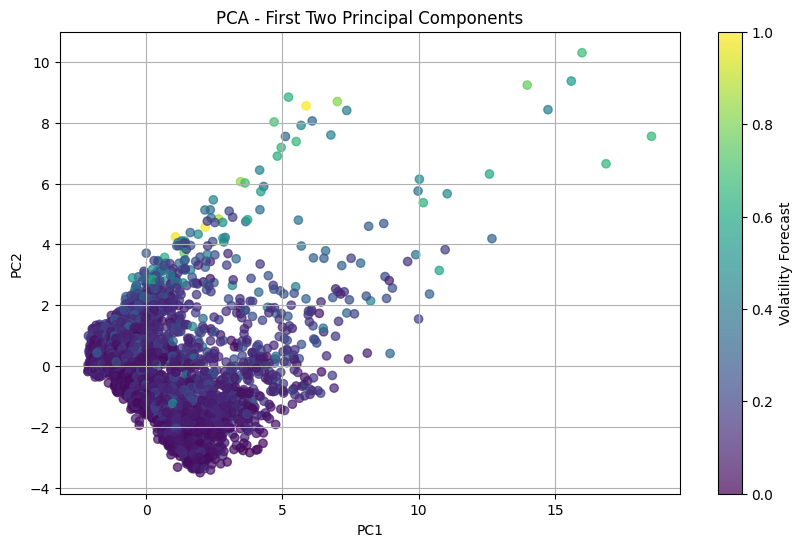

  Principal Component  Explained Variance Ratio
0                 PC1                  0.336917
1                 PC2                  0.179049


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# Explain variance ratio
explained_variance = pd.DataFrame(
    {'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
     'Explained Variance Ratio': pca.explained_variance_ratio_}
)
print(explained_variance)


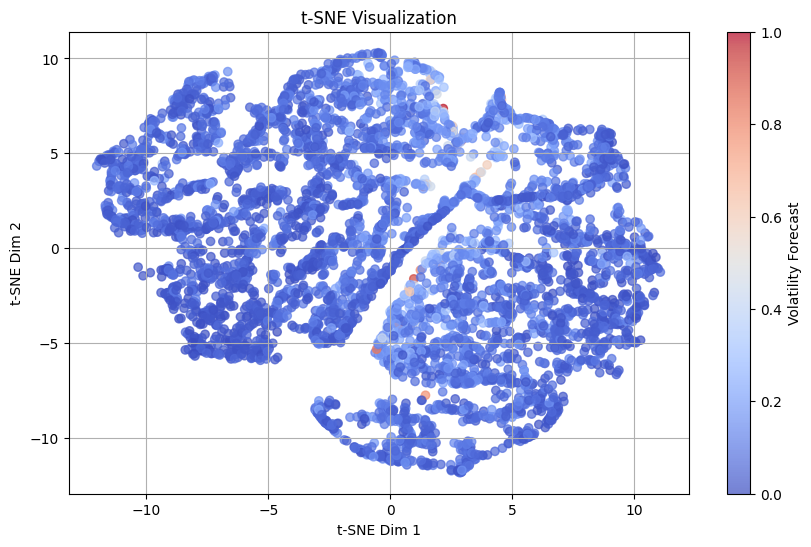

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.grid()
plt.show()


c:\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


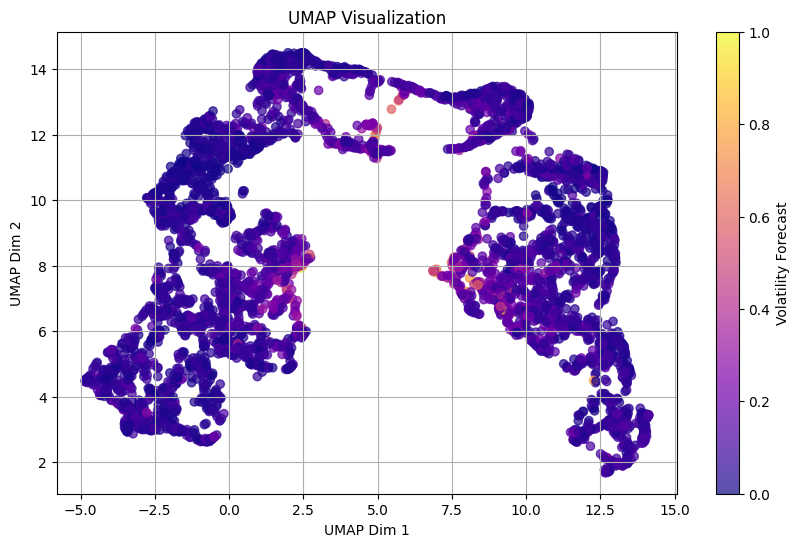

In [ ]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Visualize UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid()
plt.show()


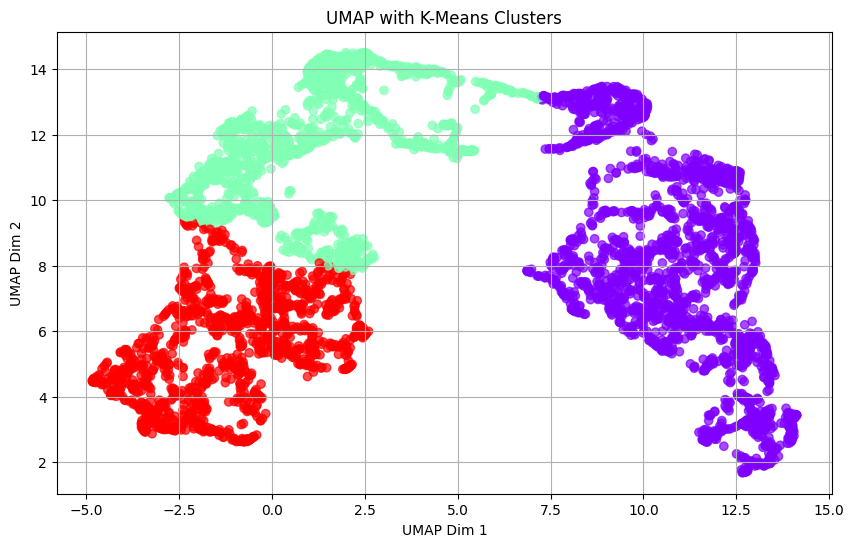

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_umap)

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
plt.title('UMAP with K-Means Clusters')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid()
plt.show()


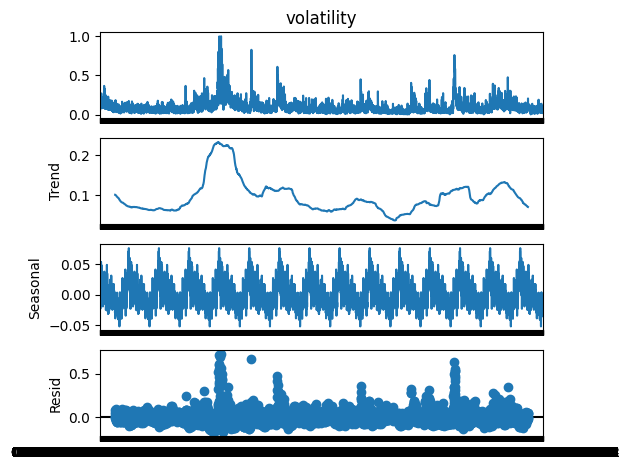

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.set_index('Date')['volatility'], model='additive', period=365)
decomposition.plot()
plt.show()


In [ ]:
# TO BE CONTINUE